### PHYS3600 ID Midterm Quiz, March 28 - Programming section

You have 10 questions; each of them is worth 5 points. Total time is one hour and you can use anything you want other than the Internet.

0: Please write your name here (but sorry no points for this one): **Christ-Brian Amedjonekou**
    
    

In [60]:
#We did the imports for you to make it easier
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier
import itertools as itr

### Part 1: Arrays and plotting

1\. Define an array that contains all the <b> odd </b> numbers between 0 and 40, without typing them in.

In [2]:
# Odd array because it's odd =)
oddArray = np.array([2*x + 1 for x in range(41)])
oddArray = oddArray[oddArray < 40]
oddArray

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

2\. Define a function that takes a number x and calculates f(x) = x**4 - 3.

In [5]:
function = lambda x: x**4 - 3

In [6]:
def other(x):
    return x**4 - 3

In [7]:
x = 1
[other(x) , function(x)] 

[-2, -2]

3\. Check whether the function above works with vectors, and if not, vectorize it. Apply the function to the array you defined in 1. to obtain another array (e.g. if the array you created above is called a, you would define another array b = f(a), where f is the name of your function). 

In [9]:
# It worked for me on my machine. I figured the lambda function will, 
# but I was unsure about the other one. But in the event that it doesn't
# use this: other_1 = np.vectorize(other)
x = np.arange(0, 10)
[other(x) , function(x)] 

[array([  -3,   -2,   13,   78,  253,  622, 1293, 2398, 4093, 6558]),
 array([  -3,   -2,   13,   78,  253,  622, 1293, 2398, 4093, 6558])]

4\. Plot these two arrays in a scatter plot. Add labels to the axes with the name of your arrays.

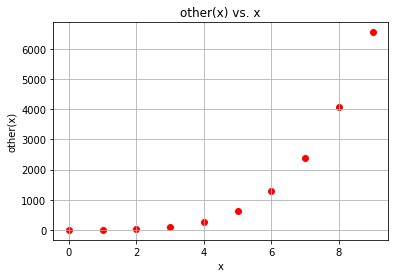

In [13]:
fig, ax1 = plt.subplots()
ax1.scatter(x, other(x), c= 'red')
ax1.set(xlabel= 'x', ylabel= 'other(x)', 
        title= 'other(x) vs. x')
ax1.grid()

### Part 2: Working with data

We will work with a data set that contains data about women's health, where the target property is whether or not the woman had a caesarian section. The file that contains the data (both features and labels) is called caesarian.csv.

5\. Read the data from the file, and define the features array with the first five columns, and the labels array, with the last column. Hint: this is a comma-separated-value file.

In [18]:
caesarianData = pd.read_csv('Datasets/caesarian.csv')

6\. How many instances are in your data set? How many features? 

* **Based on the info below it has 79 entries (instances)**
* **For the features, there are 5 features**

In [19]:
caesarianData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
22     79 non-null int64
1      79 non-null int64
0      79 non-null int64
2      79 non-null int64
0.1    79 non-null int64
0.2    79 non-null int64
dtypes: int64(6)
memory usage: 3.8 KB


In [22]:
caesarianData.head(2)

,22,1,0,2,0.1,0.2
0,26,2,0,1,0,1
1,26,2,1,1,0,0


7\. How many "positive" instances are in your data set? Is the data set very imbalanced? (Let's assume that a data set is very imbalanced if one of the classes contains < 20% of the objects).

In [21]:
features = caesarianData[['22', '1', '0', '2', '0.1']]
features.head(2)

,22,1,0,2,0.1
0,26,2,0,1,0
1,26,2,1,1,0


In [40]:
target = caesarianData['0.2']
numer = target[target == 1].size
denom = target.size
if .20 < numer/denom < .80:
    print('The Dataset is Balanced')
else:
    print('The Dataset is Imbalanced')

The Dataset is Balanced


8\. Use a decision tree classifier with deafult parameter values and report the average score of a 5-fold cross validation, and the standard deviation of the scores vector.

In [41]:
# Creates the Model
caesarianModel = DecisionTreeClassifier()

# Since my Features and Targets are separated, 
# we'll create the train and test sets

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size= 0.2, 
                                   train_size= 0.8, random_state= 5)

# Now we'll fit the model with the training data
caesarianModel.fit(xtrain, ytrain)

# Now we'll test the model by making predictions on the test set
ypred = caesarianModel.predict(xtest)

In [43]:
scores = cross_val_score(caesarianModel, features , target , cv=5)
print('Average Score: {}, Standard Deviation: {}'.format(scores.mean(), scores.std()))

Average Score: 0.5151470588235294, Standard Deviation: 0.1111706347674694


9\. Use a SVM  classifier with default parameter values and report the average score of a 5-fold cross validation, and the standard deviation of the scores vector. How is the performance, compared with the Decision Tree above?

* **The performance is better for SVM but not by much.**

In [48]:
# Creates the Model
caesarianModel2 = SVC()

# Since my Features and Targets are separated, 
# we'll create the train and test sets

xtrain1, xtes1t, ytrain1, ytest1 = train_test_split(features, target, test_size= 0.2, 
                                   train_size= 0.8, random_state= 5)

# Now we'll fit the model with the training data
caesarianModel2.fit(xtrain, ytrain)

# Now we'll test the model by making predictions on the test set
ypred1 = caesarianModel2.predict(xtest)

/Users/Chris/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
scores2 = cross_val_score(caesarianModel2, features , target , cv=5)
print('Average Score: {}, Standard Deviation: {}'.format(scores2.mean(), scores2.std()))

Average Score: 0.6083823529411765, Standard Deviation: 0.07554816974326442


/Users/Chris/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Chris/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Chris/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/Chris/anaconda/lib/python3.6/site-packages/sklearn/

10\. Use the function cross_val_predict to derive the predicted labels for your data set (you can use either model, the tree or the SVM), and print (or plot, but printing is sufficient!) the confusion matrix.

In [50]:
#This is just a function that plots them
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, return_cm= False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if return_cm == False:
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itr.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        
    else:
        return cm

In [58]:
# I used the Decision  Tree because of the warnings. Annoying!!!!!
ypred2 = cross_val_predict(caesarianModel, features, target, cv=5)

Confusion matrix, without normalization
[[15 18]
 [21 25]]


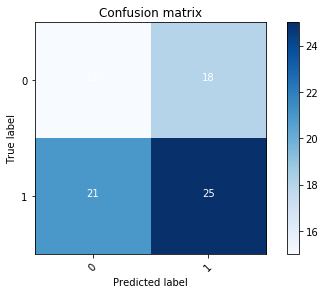

In [61]:
# Computes the confusion matrix
confuse_mtrx = confusion_matrix(target, ypred2)
np.set_printoptions(precision=2)

# Creates a figure
plt.figure()

# Plots the non-normalized confusion matrix
plot_confusion_matrix(confuse_mtrx, classes=[0, 1],
                      title='Confusion matrix')

Extra Credit 1: Can you figure out if your decision tree classifier is suffering from high bias or high variance?

Extra Credit 2: Try using a different kernel in the SVM classifier to see if you can improve performance (note: we are not asking to do nested cross validation, just change the kernel to see if results improve).